# Neural Networks
21BCE1125 Guhan Senthil Sambandam

## Import Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Define Dataset import function

In [14]:
def load_mnist():
    path = 'mnist.npz'
    # loads dataset and splits into training and test data internally
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
    return (x_train, y_train, x_test, y_test)

## Define Loss Calculation Function

In [15]:
def calculate_loss(model, X, y):
    W1, W2, W3, W4, W5, = model['W1'],model['W2'], model['W3'],model['W4'], model['W5']
    z1 = X.dot(W1)
    a1 = activation(z1)
    z2 = a1.dot(W2)
    a2 = activation(z2)
    z3 = a2.dot(W3)
    a3 = activation(z3)
    z4 = a3.dot(W4)
    a4 = activation(z4)
    z5 = a4.dot(W5)
    exp_scores = np.exp(z5)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # 标准化
    num_examples = X.shape[0]
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    return 1. / num_examples * data_loss

## Other Activation Functions

In [16]:
def relu(x):
    threshold = 100  #to prevent overflow
    clipped_x = np.clip(x, -threshold, threshold)
    return np.maximum(0, clipped_x)

def sigmoid(x):
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    return 1 / (1 + z)

## Define Prediction Function

In [17]:
def predict(model, x):
    """
    Predicts the class labels for the given input data using a trained neural network model.
    w stands for weights and b stands for bias
    
    This is a 5-layer neural network
    """
    W1, W2, W3, W4, W5, = \
        model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
    z1 = x.dot(W1)
    a1 = activation(z1)
    z2 = a1.dot(W2)
    a2 = activation(z2)
    z3 = a2.dot(W3)
    a3 = activation(z3)
    z4 = a3.dot(W4)
    a4 = activation(z4)
    z5 = a4.dot(W5)
    exp_scores = np.exp(z5)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

## Define Model With Bias

In [28]:
def build_model(X, y, nn_hdim, epsilon, reg_lambda, num_passes, print_loss=False, activation_function='tanh'):
    """
    Builds a neural network model with the specified architecture and trains it on the given data.

    inputs:
        X (numpy.ndarray): The input data of shape (num_examples, num_features).
        y (numpy.ndarray): The target labels of shape (num_examples,).
        nn_hdim (list): A list specifying the number of hidden units in each layer of the neural network.
        epsilon (float): The learning rate for gradient descent.
        reg_lambda (float): The regularization parameter.
        num_passes (int, optional): The number of passes to train the model. Defaults to 8000.
        print_loss (bool, optional): Whether to print the loss and accuracy during training. Defaults to False.
    """
    global activation
    if activation_function == 'tanh':
        activation = np.tanh
    elif activation_function == 'ReLU':
        activation = relu
    elif activation_function == 'sigmoid':
        activation = sigmoid

    np.random.seed(0)
    num_examples = X.shape[0]
    nn_input_dim = nn_hdim[0]
    print('input dim', nn_input_dim)
    np.random.seed(0)
    num_examples = X.shape[0]
    nn_input_dim = nn_hdim[0]
    print('input dim', nn_input_dim)

    # for each layer
    hdim1 = nn_hdim[1]
    W1 = np.random.randn(nn_input_dim, hdim1) / np.sqrt(hdim1)
    b1 = np.zeros((1, hdim1))
    print('fc: %d -> %d' % (nn_input_dim, hdim1))
    hdim2 = nn_hdim[2]
    W2 = np.random.randn(hdim1, hdim2) / np.sqrt(hdim2)
    b2 = np.zeros((1, hdim2))
    print('fc: %d -> %d' % (hdim1, hdim2))
    hdim3 = nn_hdim[3]
    W3 = np.random.randn(hdim2, hdim3) / np.sqrt(hdim3)
    b3 = np.zeros((1, hdim3))
    print('fc: %d -> %d' % (hdim2, hdim3))
    hdim4 = nn_hdim[4]
    W4 = np.random.randn(hdim3, hdim4) / np.sqrt(hdim4)
    b4 = np.zeros((1, hdim4))
    print('fc: %d -> %d' % (hdim3, hdim4))
    hdim5 = nn_hdim[5]
    W5 = np.random.randn(hdim4, hdim5) / np.sqrt(hdim5)
    b5 = np.zeros((1, hdim5))
    print('fc: %d -> %d' % (hdim4, hdim5))

    # train：
    model = {}
    bs = 128 #batchsize 128
    nbs_per_epoch = int(num_examples / bs) # number of batches per epoch/learning cycle
    for i in range(0, num_passes):
        j = i % nbs_per_epoch
        if 0 == j:
            ridx = np.asarray(list(range(num_examples)))
            np.random.shuffle(ridx)
            X = X[ridx, :]
            y = y[ridx]
        Xb = X[j * bs:(j + 1) * bs, :]
        yb = y[j * bs:(j + 1) * bs]
        # Forward propagation
        z1 = Xb.dot(W1) + b1
        a1 = activation(z1)
        z2 = a1.dot(W2) + b2
        a2 = activation(z2)
        z3 = a2.dot(W3) + b3
        a3 = activation(z3)
        z4 = a3.dot(W4) + b4
        a4 = activation(z4)
        z5 = a4.dot(W5) + b5
        exp_scores = np.exp(z5)
        # Backpropagation
        delta_loss = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        delta_loss[range(bs), yb] -= 1
        dW5 = (a4.T).dot(delta_loss)
        db5 = np.sum(delta_loss, axis=0, keepdims=True)
        delta5 = delta_loss.dot(W5.T) * (1 - np.power(a4, 2))
        dW4 = (a3.T).dot(delta5)
        db4 = np.sum(delta5, axis=0, keepdims=True)
        delta4 = delta5.dot(W4.T) * (1 - np.power(a3, 2))
        dW3 = (a2.T).dot(delta4)
        db3 = np.sum(delta4, axis=0, keepdims=True)
        delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))
        dW2 = a1.T.dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = (Xb.T).dot(delta2)
        db1 = np.sum(delta2, axis=0)
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        W3 += -epsilon * dW3
        b3 += -epsilon * db3
        W4 += -epsilon * dW4
        b4 += -epsilon * db4
        W5 += -epsilon * dW5
        b5 += -epsilon * db5
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,
                    'W3': W3, 'b3': b3, 'W4': W4, 'b4': b4, 'W5': W5, 'b5': b5}

        if print_loss and i % 2000 == 0:
            print(model)
            epsilon *= 0.99
            y_pred = predict(model, X_test)
            accuracy = sum(0 == (y_pred - Y_test)) / Y_test.shape[0]
            print("loss after iteration {}: {:.2f}, testing accuracy: {:.2f}%".
                    format(i, calculate_loss(model, X, y), accuracy * 100))
    return model

## Model Without Bias

In [29]:
def build_model_without_bias(X, y, nn_hdim, epsilon, reg_lambda, num_passes, print_loss=False, activation_function='tanh'):
    global activation
    if activation_function == 'tanh':
        activation = np.tanh
    elif activation_function == 'ReLU':
        activation = relu
    elif activation_function == 'sigmoid':
        activation = sigmoid
    np.random.seed(0)
    num_examples = X.shape[0]
    nn_input_dim = nn_hdim[0]
    print('input dim', nn_input_dim)
    np.random.seed(0)
    num_examples = X.shape[0]
    nn_input_dim = nn_hdim[0]
    print('input dim', nn_input_dim)

    # for each layer
    hdim1 = nn_hdim[1]
    W1 = np.random.randn(nn_input_dim, hdim1) / np.sqrt(hdim1)
    print('fc: %d -> %d' % (nn_input_dim, hdim1))
    hdim2 = nn_hdim[2]
    W2 = np.random.randn(hdim1, hdim2) / np.sqrt(hdim2)
    print('fc: %d -> %d' % (hdim1, hdim2))
    hdim3 = nn_hdim[3]
    W3 = np.random.randn(hdim2, hdim3) / np.sqrt(hdim3)
    print('fc: %d -> %d' % (hdim2, hdim3))
    hdim4 = nn_hdim[4]
    W4 = np.random.randn(hdim3, hdim4) / np.sqrt(hdim4)
    print('fc: %d -> %d' % (hdim3, hdim4))
    hdim5 = nn_hdim[5]
    W5 = np.random.randn(hdim4, hdim5) / np.sqrt(hdim5)
    print('fc: %d -> %d' % (hdim4, hdim5))

    # train：
    model = {}
    bs = 128 #batchsize 128
    nbs_per_epoch = int(num_examples / bs) # number of batches per epoch/learning cycle
    for i in range(0, num_passes):
        j = i % nbs_per_epoch
        if 0 == j:
            ridx = np.asarray(list(range(num_examples)))
            np.random.shuffle(ridx)
            X = X[ridx, :]
            y = y[ridx]
        Xb = X[j * bs:(j + 1) * bs, :]
        yb = y[j * bs:(j + 1) * bs]
        # Forward propagation
        z1 = Xb.dot(W1)
        a1 = activation(z1)
        z2 = a1.dot(W2)
        a2 = activation(z2)
        z3 = activation(W3)
        a3 = activation(z3)
        z4 = a3.dot(W4)
        a4 = activation(z4)
        z5 = a4.dot(W5)
        exp_scores = np.exp(z5)
        # Backpropagation
        delta_loss = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        delta_loss[range(bs), yb] -= 1
        dW5 = (a4.T).dot(delta_loss)
        delta5 = delta_loss.dot(W5.T) * (1 - np.power(a4, 2))
        dW4 = (a3.T).dot(delta5)
        delta4 = delta5.dot(W4.T) * (1 - np.power(a3, 2))
        dW3 = (a2.T).dot(delta4)
        delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))
        dW2 = a1.T.dot(delta3)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = (Xb.T).dot(delta2)
        W1 += -epsilon * dW1
        W2 += -epsilon * dW2
        W3 += -epsilon * dW3
        W4 += -epsilon * dW4
        W5 += -epsilon * dW5
        model = {'W1': W1, 'W2': W2,
                 'W3': W3, 'W4': W4, 'W5': W5}


        if print_loss and i % 2000 == 0:
            print(model)
            epsilon *= 0.99
            y_pred = predict(model, X_test)
            accuracy = sum(0 == (y_pred - Y_test)) / Y_test.shape[0]
            print("loss after iteration {}: {:.2f}, testing accuracy: {:.2f}%".
                  format(i, calculate_loss(model, X, y), accuracy * 100))
    return model

# Main

In [30]:
activation = np.tanh
(train_images, train_labels, test_images, test_labels) = load_mnist()
n_train, w, h = train_images.shape
X_train = train_images.reshape((n_train, w * h)) # reshape to 2D
Y_train = train_labels # labels
n_test, w, h = test_images.shape # test data
X_test = test_images.reshape((n_test, w * h)) # reshape to 2D
Y_test = test_labels # labels
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
# train
X_train = (X_train.astype(float) - 128.0) / 128.0  # normalize
X_test = (X_test.astype(float) - 128.0) / 128.0
num_examples, input_dim = X_train.shape
epsilon = 0.001
reg_lambda = 0.00

(60000, 784) (60000,)
(10000, 784) (10000,)


# Bias with tanh activation function

input dim 784
input dim 784
fc: 784 -> 256
fc: 256 -> 128
fc: 128 -> 63
fc: 63 -> 32
fc: 32 -> 10
{'W1': array([[ 0.11041147,  0.02559684,  0.06087036, ..., -0.02048893,
         0.04078462,  0.04416797],
       [-0.04519164, -0.08587323, -0.09923441, ...,  0.08080835,
         0.05351722,  0.08668141],
       [-0.08310503, -0.12245203, -0.04155428, ..., -0.06946254,
        -0.00879263,  0.00195111],
       ...,
       [ 0.11649613, -0.04819659,  0.00167925, ..., -0.0669722 ,
         0.02481859, -0.07280629],
       [ 0.08704615, -0.03169886, -0.00883342, ...,  0.05444717,
         0.04777736, -0.01769409],
       [ 0.09835778, -0.00906005,  0.00515755, ..., -0.01716313,
         0.15524343,  0.04645337]]), 'b1': array([[-1.58194684e-04, -5.87013372e-04,  3.00760742e-04,
        -3.27840484e-04, -3.16182420e-04, -5.28376142e-04,
         3.00801196e-03,  3.50613942e-04, -3.56846543e-06,
         1.03973743e-03, -5.40223538e-04, -6.51050795e-04,
         2.73388687e-04,  8.50722867e-0

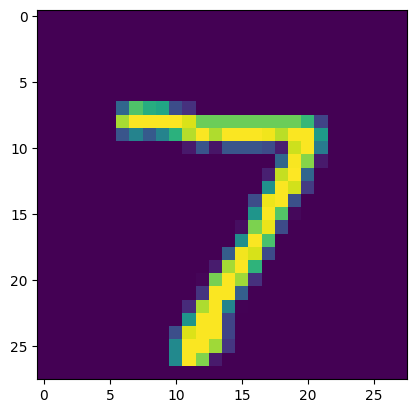

2


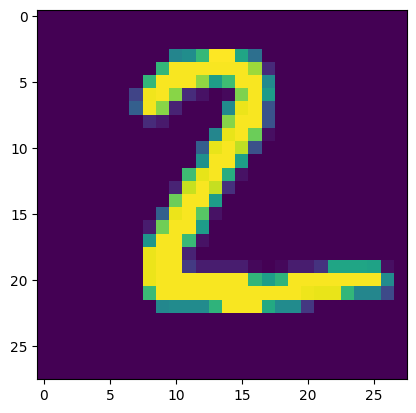

1


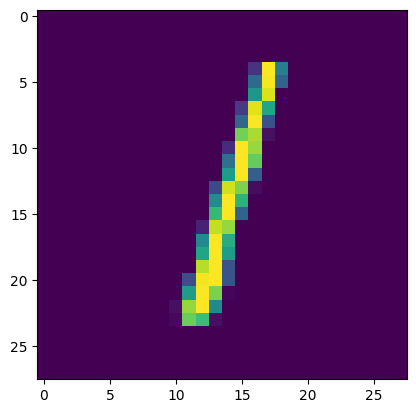

In [32]:
model = build_model(X_train, Y_train, [input_dim, 256, 128, 63, 32, 10], epsilon, reg_lambda, 4000, print_loss=True)
X_test0=X_test[0:3,:]
y_pred0 = predict(model, X_test0)
X_test0=X_test0.reshape(3,w,h)
plt.figure('Prediction 1')
plt.imshow(X_test0[0,:,:])
print(y_pred0[0])
pylab.show()
plt.figure('Prediction 2')
plt.imshow(X_test0[1,:,:])
print(y_pred0[1])
pylab.show()
plt.figure('Prediction 3')
plt.imshow(X_test0[2,:,:])
print(y_pred0[2])
pylab.show()

## Without Bias and activation function tanh

input dim 784
input dim 784
fc: 784 -> 256
fc: 256 -> 128
fc: 128 -> 63
fc: 63 -> 32
fc: 32 -> 10


loss after iteration 0: 2.66, testing accuracy: 21.06%
loss after iteration 2000: 2.23, testing accuracy: 18.74%
7


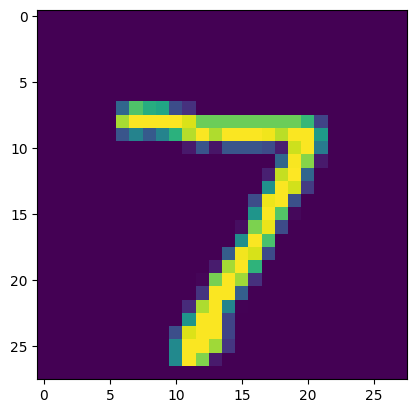

1


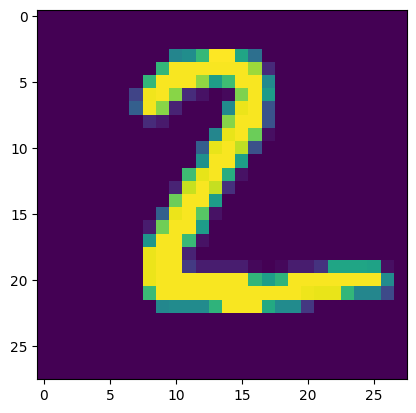

4


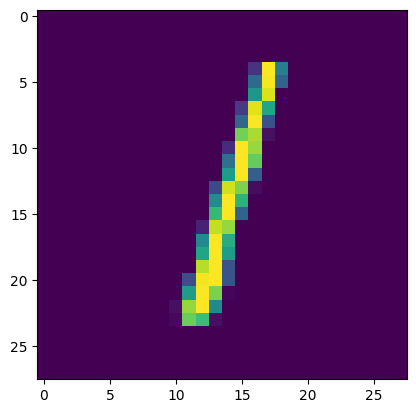

In [10]:
model = build_model_without_bias(X_train, Y_train, [input_dim, 256, 128, 63, 32, 10], epsilon, reg_lambda, 4000, print_loss=True)
X_test0=X_test[0:3,:]
y_pred0 = predict(model, X_test0)
X_test0=X_test0.reshape(3,w,h)
plt.figure('Prediction 1')
plt.imshow(X_test0[0,:,:])
print(y_pred0[0])
pylab.show()
plt.figure('Prediction 2')
plt.imshow(X_test0[1,:,:])
print(y_pred0[1])
pylab.show()
plt.figure('Prediction 3')
plt.imshow(X_test0[2,:,:])
print(y_pred0[2])
pylab.show()

## With Bias and activation function sigmoid

input dim 784
input dim 784
fc: 784 -> 256
fc: 256 -> 128
fc: 128 -> 63
fc: 63 -> 32
fc: 32 -> 10
loss after iteration 0: 2.68, testing accuracy: 9.58%
loss after iteration 2000: 2.31, testing accuracy: 10.09%
1


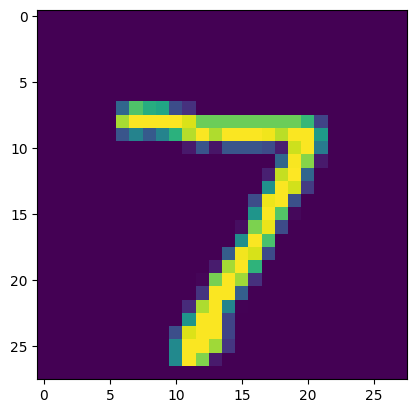

1


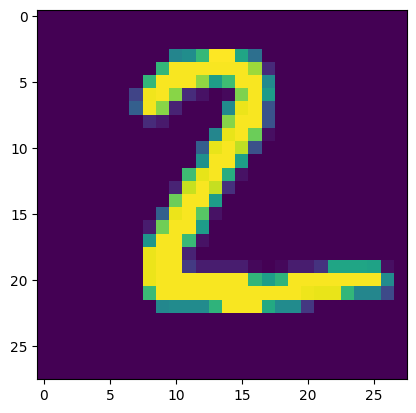

1


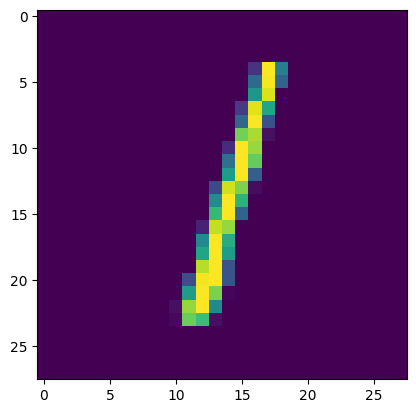

In [11]:
model = build_model(X_train, Y_train, 
                    [input_dim, 256, 128, 63, 32, 10], 
                    epsilon, 
                    reg_lambda, 
                    4000, 
                    print_loss=True, 
                    activation_function='sigmoid')
X_test0=X_test[0:3,:]
y_pred0 = predict(model, X_test0)
X_test0=X_test0.reshape(3,w,h)
plt.figure('Prediction 1')
plt.imshow(X_test0[0,:,:])
print(y_pred0[0])
pylab.show()
plt.figure('Prediction 2')
plt.imshow(X_test0[1,:,:])
print(y_pred0[1])
pylab.show()
plt.figure('Prediction 3')
plt.imshow(X_test0[2,:,:])
print(y_pred0[2])
pylab.show()

## Without Bias and activation function ReLu

input dim 784
input dim 784
fc: 784 -> 256
fc: 256 -> 128
fc: 128 -> 63
fc: 63 -> 32
fc: 32 -> 10
loss after iteration 0: 2.68, testing accuracy: 9.58%
loss after iteration 2000: 2.31, testing accuracy: 10.09%
1


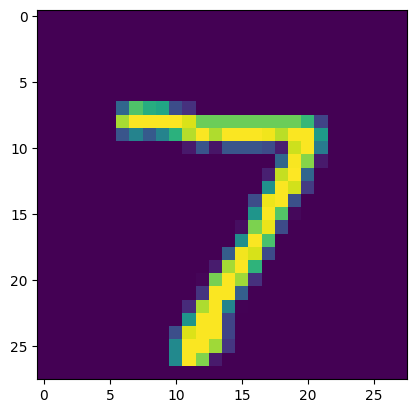

1


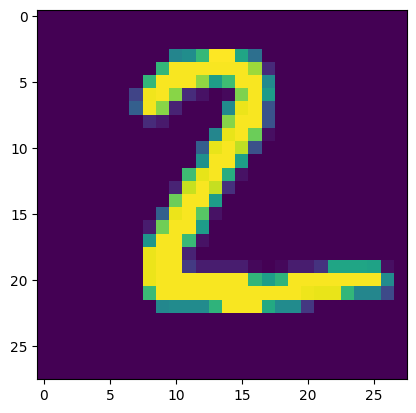

1


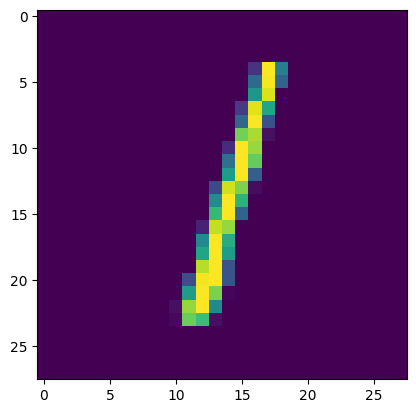

In [12]:
model = build_model(X_train, Y_train, 
                    [input_dim, 256, 128, 63, 32, 10], 
                    epsilon, 
                    reg_lambda, 
                    4000, 
                    print_loss=True, 
                    activation_function='ReLu')
X_test0=X_test[0:3,:]
y_pred0 = predict(model, X_test0)
X_test0=X_test0.reshape(3,w,h)
plt.figure('Prediction 1')
plt.imshow(X_test0[0,:,:])
print(y_pred0[0])
pylab.show()
plt.figure('Prediction 2')
plt.imshow(X_test0[1,:,:])
print(y_pred0[1])
pylab.show()
plt.figure('Prediction 3')
plt.imshow(X_test0[2,:,:])
print(y_pred0[2])
pylab.show()